# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.
You can run the other following cells in the same way.

In [2]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.7 MB/s eta 0:00:00


In [4]:
!pip install qiskit_textbook

ERROR: Could not find a version that satisfies the requirement qiskit_textbook (from versions: none)
ERROR: No matching distribution found for qiskit_textbook


In [5]:
import numpy as np
from numpy import pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# from qiskit_textbook.problems import dj_problem_oracle

## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html

It will help you to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates.

By default, states in Qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises by applying the correct rotations. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$.

<div><img src="attachment:state1.png" width="200"></div>

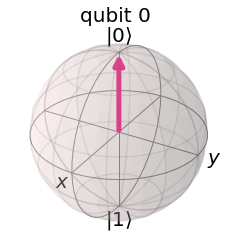

In [ ]:
def lab1_ex1():
    qc = QuantumCircuit(2)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc


state = Statevector.from_instruction(lab1_ex1())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex1

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex1(lab1_ex1())

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$.

<div><img src="attachment:plusstate.png" width="200"></div>

In [ ]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex2())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex2

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex2(lab1_ex2())

### 3.) Let's combine the two operations seen before. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$.

<div><img src="attachment:minusstate.png" width="200"></div>

Can you even come up with different ways?

In [ ]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex3())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex3

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex3(lab1_ex3())

### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$.

<div><img src=attachment:leftstate.png width="200"></div>

In [ ]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex4

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex4(lab1_ex4())

## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html

The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate. The CNOT gate has no effect when applied on two qubits in state $|0\rangle$, but this changes if we apply a Hadamard gate before to the control qubit to bring it in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. There are four Bell states in total, so let's try to also construct another one:


### 5.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

In [ ]:
def lab1_ex5():
    # This time, we not only want two qubits, but also two classical bits for the measurement
    qc = QuantumCircuit(2,2)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc = lab1_ex5()
qc.draw() # we draw the circuit

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex5

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex5(lab1_ex5())

Let us now also add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

In [ ]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

As you can see in the histogram, the only possible outputs are "01" and "10", so the states of the two qubits are always perfectly anti-correlated.

### 6.) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|011\rangle - |100 \rangle \right)$.
Hint: the following circuit constructs the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$:

<div><img src="attachment:ghz_circuit.png" width="200"></div>

In [ ]:
def lab1_ex6():
    # This time, we need 3 qubits and also add 3 classical bits in case we want to measure
    qc = QuantumCircuit(3,3)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    return qc

qc = lab1_ex6()
qc.draw() # we draw the circuit

We can now also measure this circuit the same way we did before.

In [ ]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex6

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex6(lab1_ex6())

Congratulations for finishing these introductory exercises! Hopefully, they got you more familiar with the Bloch sphere and basic quantum gates.

# Part II: Quantum Circuits and Complexity


## II.1: Complexity of the Number of Gates

We have seen different complexity classes and the big $O$ notation and how it can be used with Quantum Algorithms, when using gates.
One possible way to calculate the complexity of an algorithm is to just count the number of gates used.

Another often seen measure is to count the number of multi qubit gates rather than all gates, since they are normally "more expensive" than other gates.
In our case "more expensive" means that they often have a way higher error rate (around 10 times higher) compared to single qubit gates.

So, lets look again at the GHZ state and count the number of gates as well as the number of multi qubit gates:

In [ ]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

print(qc.size())
print(qc.num_nonlocal_gates())


3
2


Of course, in this example the number of gates is three and the number of multi qubit gates is 2, this might be obvious in this case, since we added gate by gate ourselves, but it will be less obvious when we use algorithms to construct our quantum circuits.



### II.1.1: Quantum Fourier Transform Example


Let’s  look at the example of the Quantum Fourier transform which was also shown in the lecture. If you want to learn more about it or if you want to refresh your knowledge you can read the following chapter: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html



In [ ]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    """Swaps registers to match the definition"""
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

For now, let's not do the whole Quantum Fourier Transformation but only the rotations. And let’s apply them to the quantum state we defined above and measure the number of operations used:


9
5


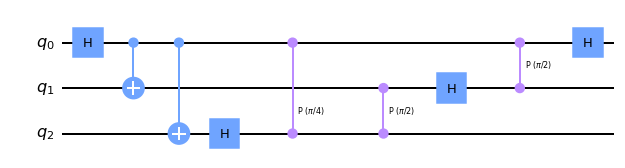

In [ ]:
qft_rotations(qc,3)
print(qc.size())
print(qc.num_nonlocal_gates())
qc.draw()

As we can see, the first 3 gates are from our GHZ state and the other 6 gates are coming from the Fourier transformation, and it looks the same no matter on which state we apply it, it will always take the same amount of gates.
This means that we can now for the next examples just consider the all 0 state (the base state which needs no gates to construct) and just consider the number of gates of the Fourier transformation itself.

In the textbook we can use the scalable circuit widget to see how the circuit for the Fourier transformation gets bigger as we apply it to more circuits. See here: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#8.2-General-QFT-Function-

We are, however, less interested in how the circuits for more qubits look like, as in how many gates the circuit will need. We saw that for 3 qubits, the quantum Fourier transformation (without the swaps) needs 6 gates in total. How many does it need for 4, 5, 10, 100, 200 qubits?

NOTE: We do ask for the total number of gates not the number of multi qubit gates. (Although this can be easily calculated as well, if you have found the solution for the total number of gates).


In [ ]:
def lab1_ex7(n:int) -> int:
    #Here we want you to build a function calculating the number of gates needed by the fourier rotation for n qubits.

    numberOfGates=0
    #
    # FILL YOUR CODE IN HERE
    # TRY TO FIND AN EXPLIZIT (NON RECURSIVE) FUNCTION
    #
    return numberOfGates

print(lab1_ex7(3))
print(lab1_ex7(4))
print(lab1_ex7(5))
print(lab1_ex7(10))
print(lab1_ex7(100))
print(lab1_ex7(200))




In [ ]:
# Lab 1, Exercise 7
from qc_grader.challenges.qgss_2022 import grade_lab1_ex7

# Note that the grading function is expecting as input a function!
#(And the function takes n as an input and outputs the number of gates constructed)
grade_lab1_ex7(lab1_ex7)

As you have seen above, the algorithm for the Quantum Fourier Transform needs $O(n^2)$ gates and one can also easily see that it also needs $O(n^2)$ two qubit gates.

If the algorithm would not have been recursive, and instead just uses several loops, this would have been even easier to see.

So, if you ever have problems analysing the complexity of a (recursive) algorithm, try to rewrite it using simple loops.

## II.2: Complexity of the Depth of a Circuit

When it comes to how well a circuit runs on an actual Quantum Computer the number of gates is not the only important factor.

The depth of the circuit tells how many "layers" of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit. More information about it can be found here, especially the animation comparing it to Tetris can help to understand the concept of depth (open "Quantum Circuit Properties" to see it): https://qiskit.org/documentation/apidoc/circuit.html#supplementary-information


Now we look at two simple examples to show what the depth of a circuit is:


6


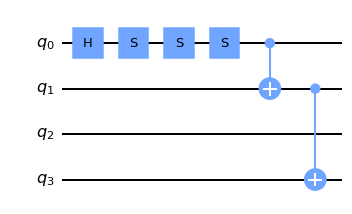

In [ ]:
qc = QuantumCircuit(4)

qc.h(0)
qc.s(0)
qc.s(0)
qc.s(0)
qc.cx(0,1)
qc.cx(1,3)

print(qc.depth())
qc.draw()




2


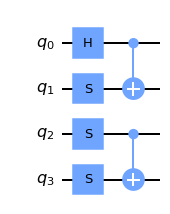

In [ ]:
qc2 = QuantumCircuit(4)

qc2.h(0)
qc2.s(1)


qc2.cx(0,1)

qc2.s(2)
qc2.s(3)

qc2.cx(2,3)

print(qc2.depth())

qc2.draw()




The length of the circuit above corresponds with the width. And as you can see, both circuits have the same number of gates, but the first circuit has a much higher depth, because all the gates depend on the gates before, so nothing can be done in parallel.

In short, the more of the gates can be applied in parallel, because they apply to different qubits, the lower will the depth of a circuit be. The lower bound on the depth of a circuit (if it has only single qubit gates and they are evenly distributed) is the number of gates divided by the number of qubits.

On the other hand, if every gate in a quantum circuit depends on the same qubit, the depth will be the same as the number of qubits.




## II.2.2: Fully Entangled State Example

Let's take a look at the example of the naive implementation of a fully entangled state:


In [ ]:
qc = QuantumCircuit(16)

#Step 1: Preparing the first qubit in superposition
qc.h(0)

#Step 2: Entangling all other qubits with it (1 is included 16 is exclude)
for x in range(1, 16):
  qc.cx(0,x)

print(qc.depth())


16


As we can see the above quantum circuit has its depth equal to its number of gates. Step 1 adds a depth of 1 and step 2 adds a depth of 15.

Let’s try to do this better! Its quite clear that we can’t do Step 1 better, but step 2 can be done a lot better. So lets try to find a solution, which only uses a depth of 4, instead of 15!

Hint: Lets think about what kind of asymptotic running time would cause only 4 operations. And don't forget that the final depth will be 5 (Step 1 and 2 combined).


In [ ]:
def lab1_ex8():
    qc = QuantumCircuit(16) #Same as above

    #Step 1: Preparing the first qubit in superposition
    qc.h(0)

    #
    #
    # FILL YOUR CODE IN HERE
    #
    return qc

qc = lab1_ex8()
print(qc.depth())


In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex8
# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex8(lab1_ex8())

Congratulation! You just improved the depth of a circuit by a factor of 9 thanks to your understanding of asymptotic complexity and quantum circuits.